<IPython.core.display.Javascript object>


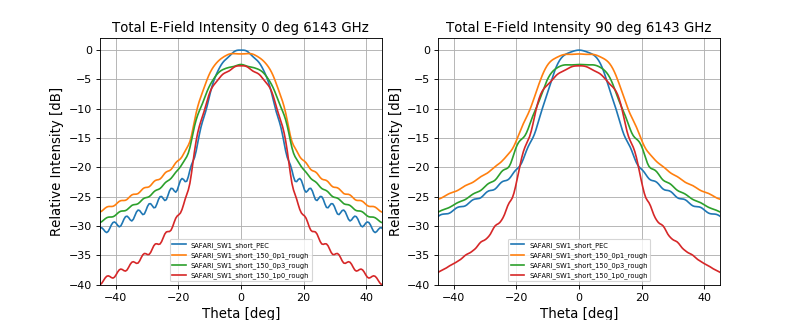

In [72]:
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
freq = 6143
# set up plot
plt.figure(figsize=(10,4),dpi=100)
ax0 = plt.subplot(121)
ax0.set_title("Total E-Field Intensity 0 deg %s GHz"%(freq), fontsize=12)
ax0.set_xlabel("Theta [deg]" ,fontsize = 12)
ax0.set_ylabel("Relative Intensity [dB]" ,fontsize = 12)
ax90 = plt.subplot(122)
ax90.set_title("Total E-Field Intensity 90 deg %s GHz"%(freq), fontsize=12)
ax90.set_xlabel("Theta [deg]" ,fontsize = 12)
ax90.set_ylabel("Relative Intensity [dB]" ,fontsize = 12)

ax0.set_xlim([-45, 45])
ax0.grid(True)   

ax90.set_xlim([-45, 45])
ax90.grid(True)  

# generate angle values
MAXPHI = np.pi/2
MAXTHETA = np.pi/2
STARTPHI=-np.pi/2
STARTTHETA = -np.pi/2
NUMPHI = 180
NUMTHETA = 360
PHI, THETA = np.meshgrid(np.linspace(STARTPHI,MAXPHI, NUMPHI), np.linspace(STARTTHETA,MAXTHETA,NUMTHETA))
theta = np.rad2deg(THETA[:,0])

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='',
                    width='50%')

PEC_Horn = widgets.ToggleButtons(options=['SAFARI_SW1_short', 'SAFARI_SW1_med', 'SAFARI_SW1_long'],
                                 description='PEC Horn',
                                 disabled=False,
                                 button_style='',
                                 layout=box_layout)
     

PEC_App = widgets.ToggleButtons(options=['100', '120', '150','100x150'],
                                  description='PEC App',
                                  disabled=False,
                                  button_style='',
                                  layout=box_layout)
 

Horn_designs = widgets.SelectMultiple(
                options=['SAFARI_SW1_short', 'SAFARI_SW1_med', 'SAFARI_SW1_long'],
                value=['SAFARI_SW1_short'],
                description='Horns',
                disabled=False
                )

Wall_Material = widgets.SelectMultiple(
                options=['PEC', '0p1_rough', '0p3_rough', '1p0_rough'], 
                value=['0p1_rough'], 
                description='Wall_Material',
                disabled=False
                )

App_size = widgets.SelectMultiple(
                options=['100', '120', '150','100x150'],
                value=['100'],
                #rows=10,
                description='App_size',
                disabled=False
                )

Y_LimLEFT= widgets.IntRangeSlider(
    value=(-40, 2), 
    min=-100, max=10, step=1, 
    description='Y Limit 0'
)
Y_LimRIGHT= widgets.IntRangeSlider(
    value=(-40, 2), 
    min=-100, max=10, step=1, 
    description='Y Limit 90'
)


PlotButton = widgets.Button(
    description='Plot Selected',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Plot Selected',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
SaveButton = widgets.Button(
    description='Save Plot',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Save Plot',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
filename = widgets.Textarea(
    value='',
    placeholder='Type something filename',
    description='Enter Filename:',
    disabled=False
)

showLegend=widgets.Checkbox(
    value=True,
    description='Show Legend',
    disabled=False,
    indent=False
)

normalisePEC=widgets.Checkbox(
    value=True,
    description='Normalise to PEC Data',
    disabled=False,
    indent=False
)


def update(change):
    """Remove old lines from plot and plot new one"""
    ax0.clear()
    ax90.clear()
    
    C = []
    ET0 = []
    ET90 = []
    
    
    
    if PEC_App.value == "100":
        load = PEC_Horn.value+"_"+"PEC"
    else:
        load = PEC_Horn.value+"_"+PEC_App.value+"_"+"PEC"
    ET0.append(np.loadtxt("Farfield_Cuts/%s_0.dat"%load))
    ET90.append(np.loadtxt("Farfield_Cuts/%s_90.dat"%load))
    C.append(load)
    
    for horn in Horn_designs.value:
        for material in Wall_Material.value:
            for aperture in App_size.value:
                if aperture == "100":
                    load = horn+"_"+material
                else:
                    load = horn+"_"+aperture+"_"+material
                ET0.append(np.loadtxt("Farfield_Cuts/%s_0.dat"%load))
                ET90.append(np.loadtxt("Farfield_Cuts/%s_90.dat"%load))
                C.append(load)
        
    if normalisePEC.value:
        MAX = np.max(np.asarray(ET0[0]))
    else:
        MAX = np.max(np.asarray(ET0))
        
    for Cn, ETn0,ETn90 in zip(C,ET0,ET90):
        ax0.plot(theta, 10*np.log10(ETn0/MAX),label=Cn)
        ax90.plot(theta, 10*np.log10(ETn90/MAX),label=Cn)
        
    ax0.set_title("Total E-Field Intensity 0 deg %s GHz"%(freq), fontsize=12)
    ax90.set_title("Total E-Field Intensity 90 deg %s GHz"%(freq), fontsize=12)
    
    ax0.set_xlim([-45, 45])
    ax0.set_ylim(Y_LimLEFT.value)
    ax0.grid(True)   
    ax0.set_xlabel("Theta [deg]" ,fontsize = 12)
    ax0.set_ylabel("Relative Intensity [dB]" ,fontsize = 12)
    
    ax90.set_xlim([-45, 45])
    ax90.set_ylim(Y_LimRIGHT.value)
    ax90.grid(True) 
    ax90.set_xlabel("Theta [deg]" ,fontsize = 12)
    ax90.set_ylabel("Relative Intensity [dB]" ,fontsize = 12)
    if showLegend.value:
        ax0.legend(loc="lower center",fontsize = 6)
        ax90.legend(loc="lower center",fontsize = 6)
    
def saveFigure(change):
    plt.savefig(filename.value+ ".png",dpi =300)
    
    
PlotButton.on_click(update)
SaveButton.on_click(saveFigure)
    
    
# a VBox container to pack widgets vertically
vbox0 = widgets.VBox([PEC_Horn,   
                      PEC_App],layout = Layout(width='200px'))

vbox1 = widgets.VBox([widgets.Label(value="Select Rough Datasets"),Horn_designs,  
                      Wall_Material, 
                      App_size,])



vbox2 = widgets.VBox([Y_LimLEFT,
                      Y_LimRIGHT,
                      PlotButton,
                      showLegend,normalisePEC,
                      filename,
                      SaveButton])

new_layout = Layout(overflow='visible',
                    border='3px solid black',
                    width='1000px',
                    height='',
                    flex_flow='row',
                    display='flex')

widgets.HBox([vbox0,
              vbox1,
              vbox2])
